# Point of this file is to try to develop a more correct model for a linescan of a single source
$$A\max\left(\alpha\arctan{\left(\frac{\frac{W_\text{slit}}{2}−|x|}{L}\right)},0\right)+A\max\left((1−\alpha)\arctan{\left(\frac{\frac{W_\text{scintillator}}{2}−|x|}{L}\right)},0\right)$$

The above model assumes only one thing blocking your scintillator, and does nothing about the convolution

the parameters are:
- $\alpha$ proportionality constant for how much signal gets through the gates
- $W_\text{slit}$ is the width of the slit created by the gates
- $W_\text{scintillator}$ is the width of the scintillator
- $L$ is the translational distance travelled, centered in the middle between the slits
- $A$ is the proportionality constant for total signal


In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:

def singleSlit(coords, amplitude, x0, W, L):
    x = coords
    return max(amplitude * np.arctan((W/2 - np.abs(x-x0))/L), 0)

def stackedSlit(coords, amplitude, x0, Wslit, Wscint, L, alpha):
    return (1-alpha) * singleSlit(coords, amplitude, x0, Wslit, L) + alpha * singleSlit(coords, amplitude, x0, Wscint, L)

In [11]:
xArr = np.linspace(-10,10,1000)
stackedSlitModel = []
# singleSlitModel = []
for x in xArr:
    stackedSlitModel.append(stackedSlit(x, 1000, 0, 2, 20, 100, 0.03))
    # singleSlitModel.append(singleSlit(x, 1000, 0, 2, 100) * 0.03)
    # singleSlitModel.append(singleSlit(x, 1000, 0, 20, 100) * 0.03)


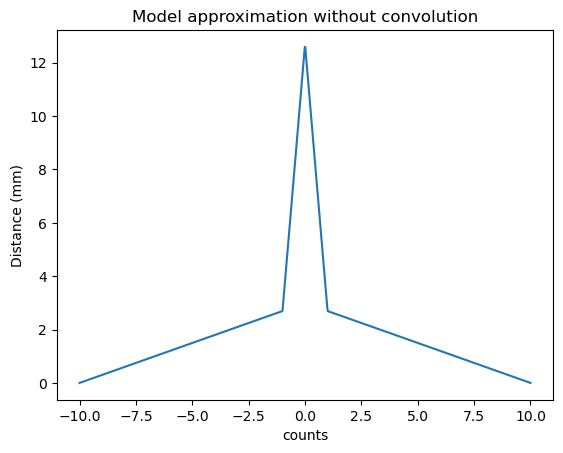

In [12]:
plt.figure()
plt.plot(xArr, stackedSlitModel)
# plt.plot(xArr, singleSlitModel)
plt.title("Model approximation without convolution")
plt.ylabel("Distance (mm)")
plt.xlabel("counts")
plt.show()